In [8]:
import matplotlib.pyplot as plt
import numpy as np

from gglm.kernel.fun import KernelFun
from gglm.glm.base import GLM
from sptr.sptr import SpikeTrain

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


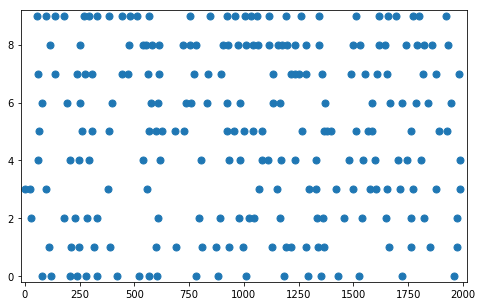

In [9]:
glm = GLM(u0=4, eta=KernelFun.single_exponential(10, A=7))

t = np.arange(0, 2000, 1)
u, r, mask_spikes = glm.sample(t, shape=(10,))
st = SpikeTrain(t, mask_spikes)

st.plot()

[6. 3.]
Starting gradient ascent... 

 Iteration 78 of 150 | Elapsed time: 0.32 seconds | objective=-1219.89
 
 Iteration 78 of 150 | Converged | Elapsed time: 0.0053 minutes | Log posterior is monotonic 

[4.13982375 6.47255653]


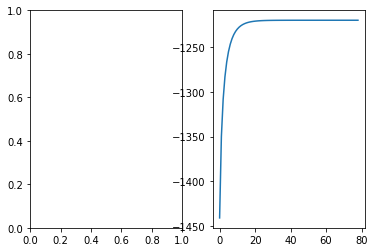

In [10]:
glm_fit = GLM(u0=6, eta=KernelFun.single_exponential(10, A=3))
print(glm_fit.get_params())
newton_kwargs = dict(learning_rate=1e-1, max_iterations=150, 
                     stop_cond=1e-9, use_hessian=True)
optimizer = glm_fit.fit(t, mask_spikes, newton_kwargs=newton_kwargs, verbose=True)
print(glm_fit.get_params())

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax2.plot(optimizer.obj_iterations)